# TP N¬∞1 : Perceptron mono-couche
Travail fait par : Yasmine Gharbi et Arij Habbechi RT4/1

Objectif :
Ce TP a pour objectif d‚Äôintroduire les bases de la th√©orie des r√©seaux de neurones et d‚Äôintroduire
le cas particulier du perceptron. Nous allons examiner l'algorithme Perceptron, qui est le r√©seau
de neurones √† une seule couche le plus √©l√©mentaire utilis√© pour la classification binaire.

# I. Travail √† faire :

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

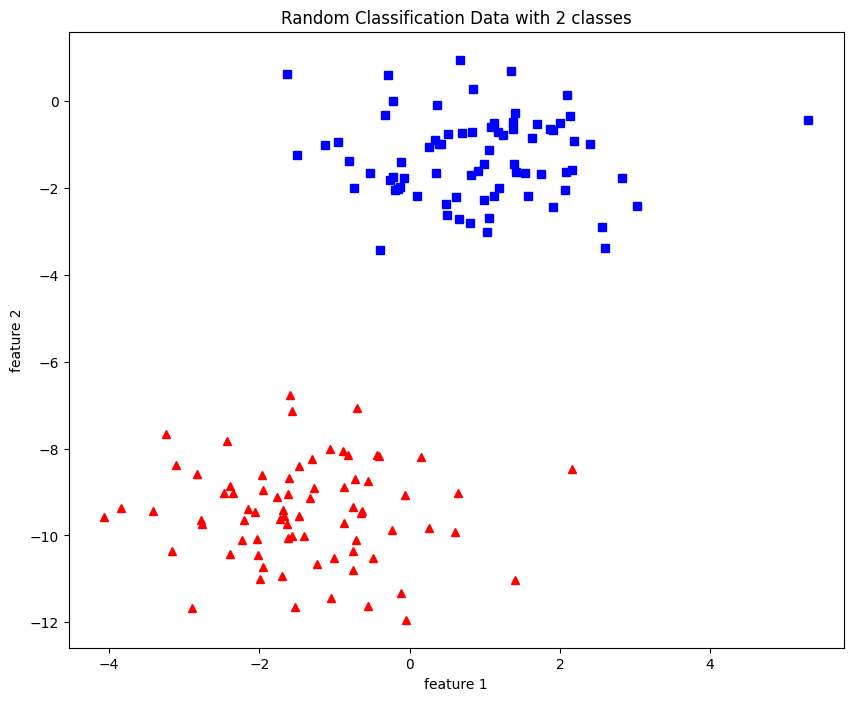

In [ ]:
from sklearn import datasets
from matplotlib import pyplot as plt

X, y = datasets.make_blobs (n_samples=150, n_features=2, centers=2, cluster_std=1.05,random_state=2)

#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

## Impl√©mentation :

In [ ]:
# Heaviside activation function :
def acti_func(z):
  if (z > 0):
    return 1
  return 0


In [ ]:
# Implementer l‚Äôalgorithme de perceptron
import numpy as np

def perceptron(X, y, lr, epochs):
  # X --> Inputs.
  # y --> labels/target.
  # lr --> learning rate.
  # epochs --> Number of iterations.
  # m-> number of training examples
  # n-> number of features
  m, n = X.shape
  # Initializing parameters(theta) to zeros.
  # +1 in n+1 for the bias term.
  w = np.zeros((n+1,1))
  # Empty list to store how many examples were
  # misclassified at every iteration.
  n_miss_list = []
  # Training.
  for epoch in range(epochs):
    # variable to store #misclassified.
    n_miss = 0
    # looping for every example.
    for idx, x_i in enumerate(X):
      # Insering 1 for bias, X0 = 1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      # Calculating prediction/hypothesis.
      y_hat = acti_func(np.dot(x_i.T, w))
      # Updating if the example is misclassified.
      if (np.squeeze(y_hat) - y[idx]) != 0:
        w+=lr*(y[idx]-y_hat)*x_i
        # Incrementing by 1.
        n_miss+=1
    # Appending number of misclassified examples
    # at every iteration.
    n_miss_list.append(n_miss)
  return w, n_miss_list

In [ ]:
w, _= perceptron(X, y, 0.001, 10)

In [ ]:
w

array([[0.01      ],
       [0.0014886 ],
       [0.00169384]])

In [ ]:
perceptron(X, y, 0.0000000001, 2)

(array([[1.00000000e-09],
        [1.48859540e-10],
        [1.69384333e-10]]),
 [14, 0])

In [ ]:
# Tracez la limite de d√©cision trouv√©e par votre algorithme.
def plot_decision_boundary(X, w):
  # X --> Inputs
  # w --> parameters
  # The Line is y=mx+c
  # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
  # Solving we find m and c
  x1 = [min(X[:,0]), max(X[:,0])]
  m = - w[1]/w[2]
  c = - w[0]/w[2]
  x2 = m*x1 + c
  # Plotting
  plt.plot(x1,x2,'g',label='decision boundary')

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

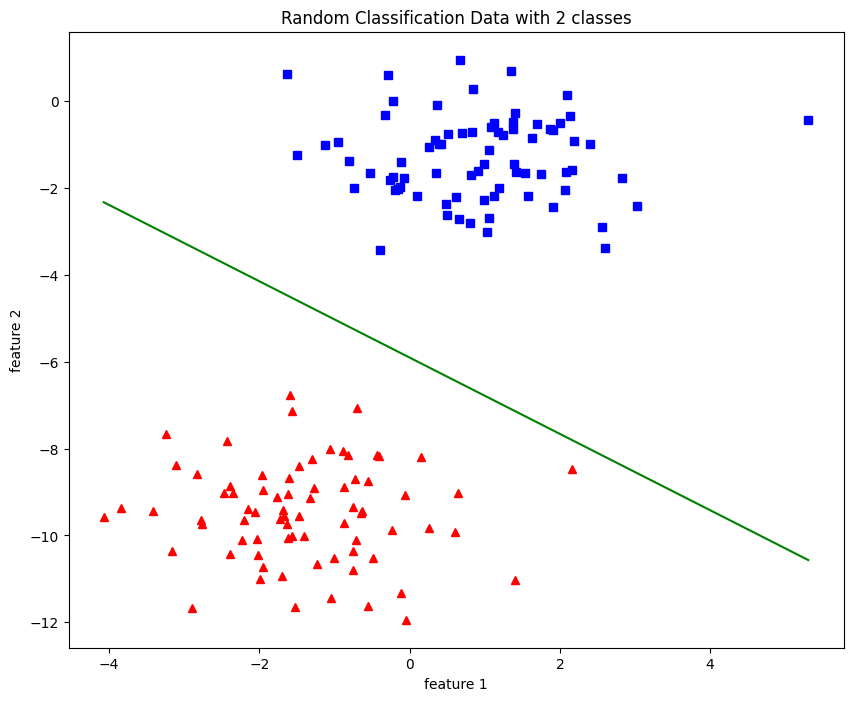

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X,w)
plt.title('Random Classification Data with 2 classes')

# Exercice2

Consid√©rons le data set S = {(x, y)}_{i=1}^{250} compos√© de 250 points ùë•ùëñ = (ùë•1, ùë•2) et leur classes yùëñ.
Les premi√®res 125 x_i sont class√©es yùëñ = 1 et sont g√©n√©r√©es selon une distribution gaussienne ùë•ùëñ‚àºùëÅ(ùúá1,œÉ^2_1), o√π ùúá1=[-1,0]

Les derni√®res 125 x_i sont class√©es yùëñ = 0 et sont g√©n√©r√©es selon une distribution gaussienne ùë•ùëñ‚àºùëÅ(ùúá2,œÉ^2_2), o√π ùúá2=[1,0]

Apr√®s avoir m√©lang√© le dataset, on va le diviser en train et test sets, contenant 80 % et 20 % du dataset (en utilisant des m√©thodes de shuffling et de splitting existantes).


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_dataset(nbrClass1, nbrClass2, mu1, mu2, sigma1, sigma2, train_size=0.8, random_state=42):
    # G√©n√©ration des points pour la classe 1
    class1_points = np.random.normal(mu1, sigma1, (nbrClass1,2))

    # G√©n√©ration des points pour la classe 0
    class2_points = np.random.normal(mu2, sigma2, (nbrClass2,2))

    # Cr√©ation des √©tiquettes de classe
    class1_labels = np.full(nbrClass1, 1)
    class2_labels = np.full(nbrClass2, 0)

    # Concat√©nation des points et des √©tiquettes
    X = np.concatenate((class1_points, class2_points), axis=0)
    y = np.concatenate((class1_labels, class2_labels))

    # M√©lange des donn√©es
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

## Implementation de code de perceptron :
Initializing the weights to zero in a multilayer perceptron (MLP) can lead to issues such as symmetry breaking, vanishing gradients, and identical neuron behavior. To overcome these problems, it's essential to initialize the weights randomly using techniques like Xavier (Glorot) initialization or He initialization. These methods help break symmetry and ensure effective gradient flow during training.

In [ ]:
# Implementer l‚Äôalgorithme de perceptron
import numpy as np

def perceptron(X, y, lr, epochs):
  # X --> Inputs.
  # y --> labels/target.
  # lr --> learning rate.
  # epochs --> Number of iterations.
  # m-> number of training examples
  # n-> number of features
  m, n = X.shape
  # Initializing parameters(theta) to zeros.
  # +1 in n+1 for the bias term.
  w = np.random.rand(n + 1, 1)* 1e-2 # multiplie by 0.01 to make the initial weights small
  # Empty list to store how many examples were
  # misclassified at every iteration.
  n_miss_list = []
  # Training.
  for epoch in range(epochs):
    # variable to store #misclassified.
    n_miss = 0
    # looping for every example.
    for idx, x_i in enumerate(X):
      # Insering 1 for bias, X0 = 1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      # Calculating prediction/hypothesis.
      y_hat = acti_func(np.dot(x_i.T, w))
      # Updating if the example is misclassified.
      if (np.squeeze(y_hat) - y[idx]) != 0:
        w+=lr*(y[idx]-y_hat)*x_i
        # Incrementing by 1.
        n_miss+=1
    # Appending number of misclassified examples
    # at every iteration.
    n_miss_list.append(n_miss)
  return w, n_miss_list

In [ ]:
# dataset
# Param√®tres
n_points = 250
nbrClass1 =125
nbrClass2 =125
mu1 = np.array([-1, 0])
mu2 = np.array([1, 0])

## Predict function to calculate accuracy later :

In [ ]:
def predict(X,w):
    m, n = X.shape
    predicted_labels =[]
    for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            predicted_labels.append(y_hat)
    return predicted_labels

## Experience 1 : œÉ_1^2 = œÉ_2^2 = 0.25

In [ ]:

X_train, X_test, y_train, y_test = generate_dataset(nbrClass1, nbrClass2, mu1, mu2, 0.25, 0.25)


In [ ]:
# learning rate and number of epochs
lr = 0.01
epochs = 100

# perceptron function with training data
w_exp1, _ = perceptron(X_train, y_train, lr, epochs)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

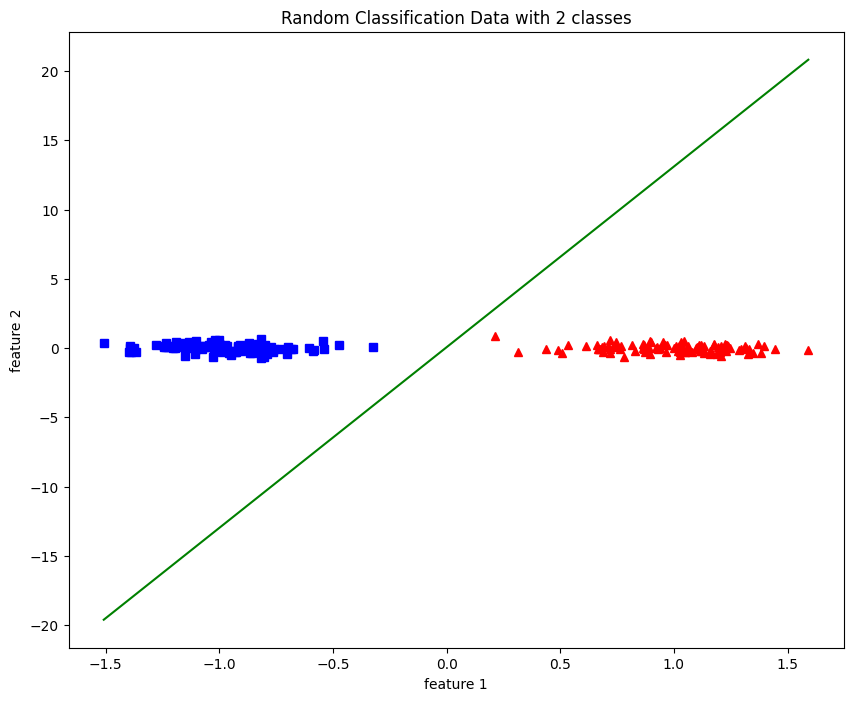

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 0][ y_train == 0], X_train[:, 1][ y_train == 0], 'r^')
plt.plot(X_train[:, 0][ y_train == 1], X_train[:, 1][ y_train == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X_train,w_exp1)
plt.title('Random Classification Data with 2 classes')



- l'algorithme converge il s√©pare les deux clusters grace au sigma petite=0.25 qui g√©n√©re une bonne dataset

- la limite de d√©cision tracee n'est pas unique. Elle d√©pend de l'initialisation des weights, nombre d'epochs et learning rate

La justesse (accuracy) de la classification sur l'ensemble de test :

In [ ]:
from sklearn.metrics import accuracy_score
exp1_predicted = predict(X_test, w_exp1)
score = accuracy_score(exp1_predicted, y_test)
print(f'accuracy =  {int(score*100)} %')

accuracy =  100 %


Text(0.5, 1.0, 'Decision boundary of 2 classes: Test Data')

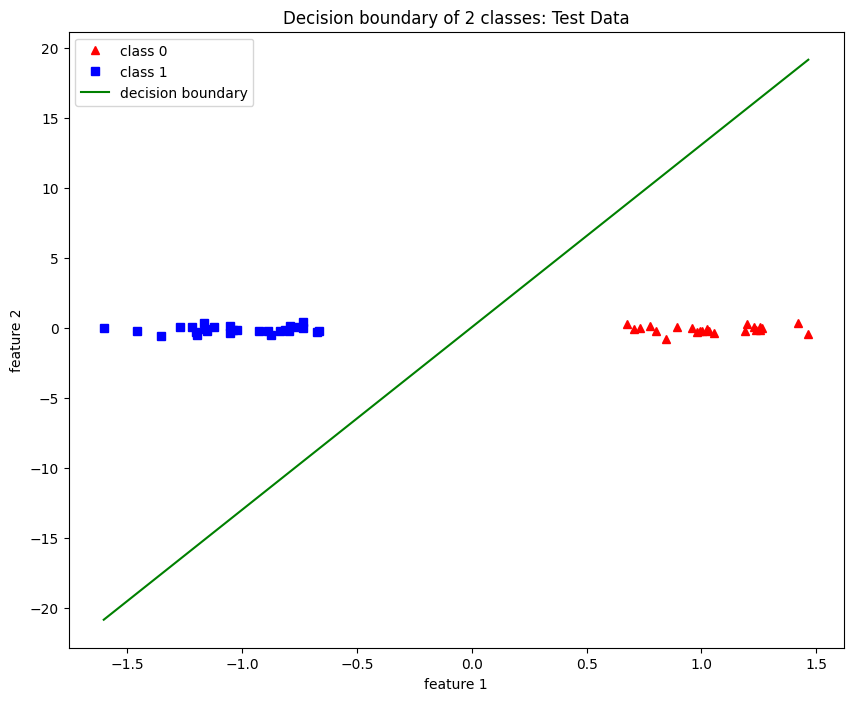

In [ ]:
#tracer la limite de d√©cision sur l'ensemble de test
fig = plt.figure(figsize=(10,8))
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'r^',label='class 0')
plt.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], 'bs',label='class 1')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X_test,w_exp1)
plt.legend()
plt.title('Decision boundary of 2 classes: Test Data')

## Experience 2 : œÉ_1^2 = œÉ_2^2 = 0.75

In [ ]:
X_train, X_test, y_train, y_test = generate_dataset(nbrClass1, nbrClass2, mu1, mu2, 0.75, 0.75)

In [ ]:
# learning rate and number of epochs
lr = 0.01
epochs = 100

# perceptron function with training data
w_exp2, _ = perceptron(X_train, y_train, lr, epochs)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

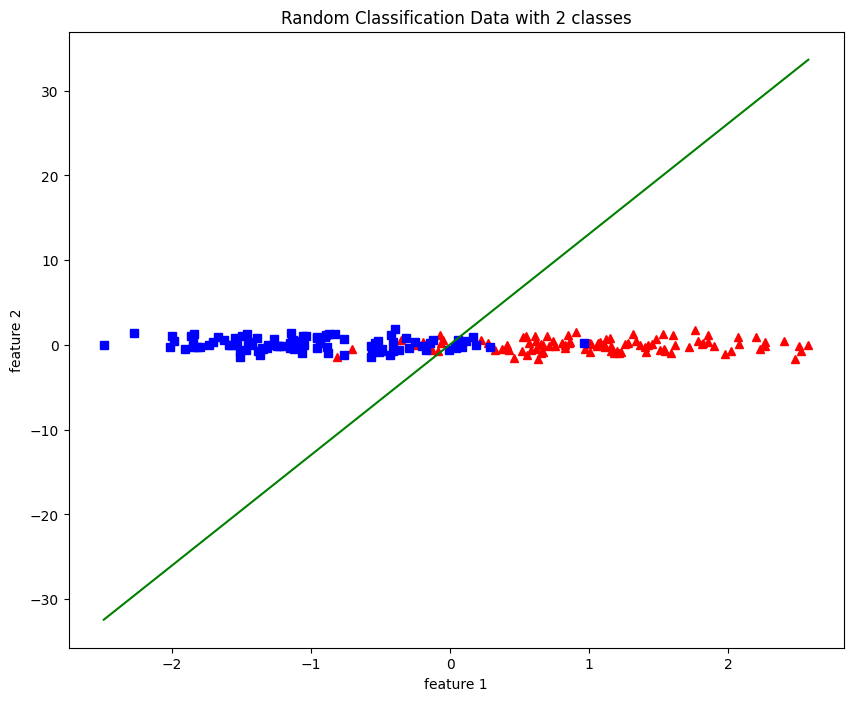

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 0][ y_train == 0], X_train[:, 1][ y_train == 0], 'r^')
plt.plot(X_train[:, 0][ y_train == 1], X_train[:, 1][ y_train == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X_train,w_exp1)
plt.title('Random Classification Data with 2 classes')



- l'algorithme ne converge pas car il n'arrive pas a s√©pare les deux clusters a cause de sigma grande =0.75 qui g√©n√©re une dataset plus eclatee dans l'espace

- la limite de d√©cision tracee n'est pas unique. Elle d√©pend de l'initialisation des weights, nombre d'epochs et learning rate

La justesse (accuracy) de la classification sur l'ensemble de test :

In [ ]:
from sklearn.metrics import accuracy_score
exp2_predicted = predict(X_test, w_exp2)
score = accuracy_score(exp2_predicted, y_test)
print(f'accuracy =  {int(score*100)} %')

accuracy =  92 %


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

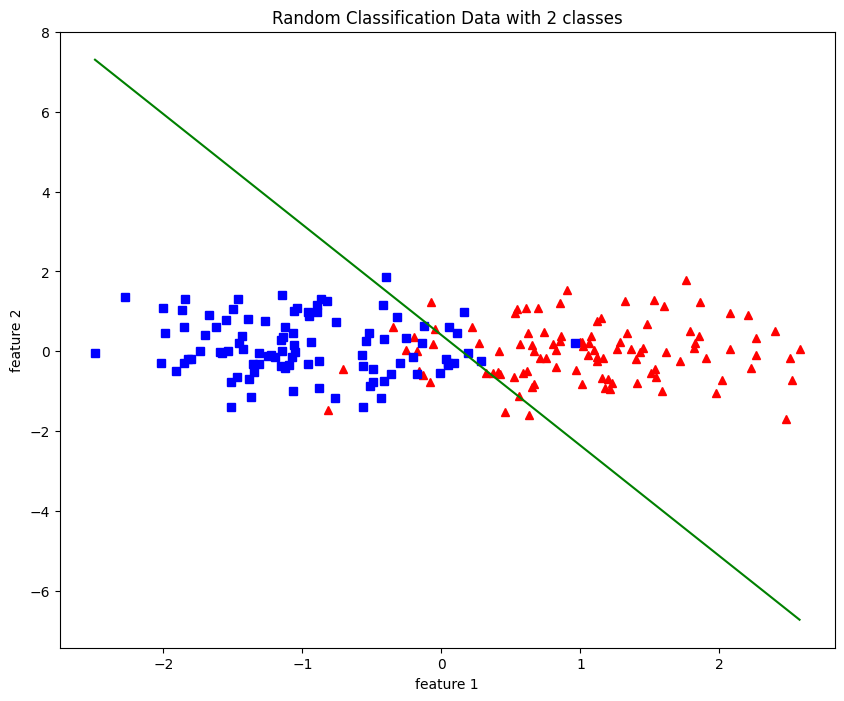

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 0][ y_train == 0], X_train[:, 1][ y_train == 0], 'r^')
plt.plot(X_train[:, 0][ y_train == 1], X_train[:, 1][ y_train == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision_boundary(X_train,w_exp2)
plt.title('Random Classification Data with 2 classes')

## Experience 3 :
Afin d'√©tudier l'impact de la variation de œÉ2
1
et œÉ2
2
sur les performances du syst√®me, nous
stockons l'erreur sur plusieurs exp√©riences (prendre nb exp√©rience = 30). Puis on calcule la
moyenne et la variance des erreurs stock√©es. Pour chaque œÉ1
2
et œÉ2
2 ‚àà [0.01, 0.1, 0.5, 0.7] calculez la moyenne et la variance puis tracez les r√©sultats en utilisant
matplotlib.pyplot.errorbar.

In [ ]:
def eval_perceptron(nbr_exp, sigma1, sigma2):

  test_errors=[]
  for i in range(nbr_exp):

    X_train, X_test, y_train, y_test = generate_dataset(nbrClass1, nbrClass2, mu1, mu2, sigma1, sigma2)
    w,_=perceptron(X_train,y_train,0.01,100)
    predicted = predict(X_test, w)
    test_errors.append(1-accuracy_score(predicted, y_test))

  mean_error = np.mean(test_errors)
  std_error = np.std(test_errors)

  return mean_error,std_error


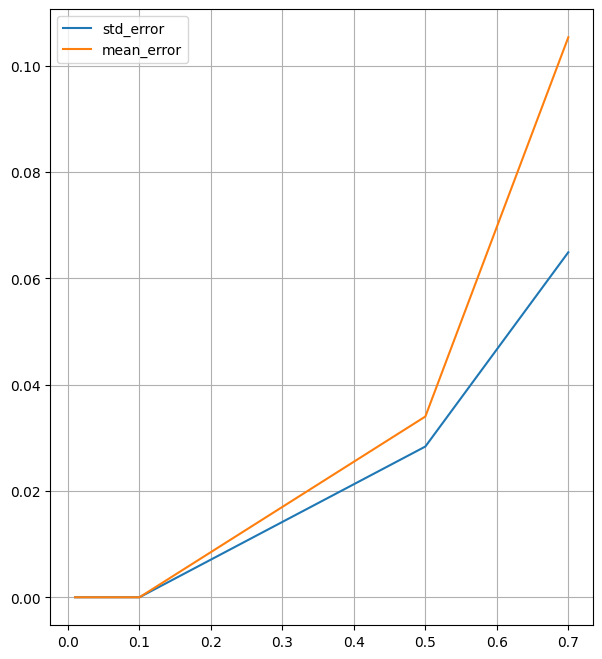

In [ ]:
mean_errors=[]
std_errors=[]

fig = plt.figure(figsize=(7,8))
for sigma in [0.01, 0.1, 0.5, 0.7]:
  mean_err,std_err=eval_perceptron(30,sigma,sigma)
  mean_errors.append(mean_err)
  std_errors.append(std_err)


plt.grid()
plt.errorbar([0.01, 0.1, 0.5, 0.7], std_errors,label='std_error')
plt.errorbar([0.01, 0.1, 0.5, 0.7], mean_errors,label='mean_error')
plt.legend()

##Commenter le r√©sultat:
Ce graphique montre que sigma a un effet √©norme sur la pr√©cision de la classification.
En effet, lorsque sigma augmente, l'erreur de vitesse variable augmente, ce qui peut √™tre attribu√© au fait qu'une valeur √©lev√©e de std entra√Æne une grande dispersion des points de donn√©es au sein de chaque cluster, conduisant √† leur chevauchement.

**Conclusion g√©n√©rale**

Au cours de ce TP, nous avons examin√© l'impact des variances de distribution des donn√©es sur les performances de l'algorithme du perceptron. Nos exp√©riences ont clairement d√©montr√© que l'√©cart type  des distributions de donn√©es joue un r√¥le crucial dans la pr√©cision de classification du perceptron.

Principales conclusions :

√Ä mesure que sigma augmente, l'erreur de classification augmente √©galement, un ph√©nom√®ne qui peut √™tre directement li√© √† la dispersion accrue des points de donn√©es au sein de chaque classe. Des valeurs plus √©lev√©es de sigma entra√Ænent un chevauchement plus important entre les classes, compliquant la t√¢che d'un classificateur lin√©aire comme le perceptron.


Le perceptron fonctionne de mani√®re optimale lorsque les classes sont distinctes et bien s√©par√©es, ce qui se produit √† des valeurs de sigma plus basses. En revanche, √† des valeurs de sigma plus √©lev√©es o√π les points de donn√©es sont plus dispers√©s et se chevauchent davantage, la capacit√© du perceptron √† classer pr√©cis√©ment les donn√©es diminue significativement.


Ces r√©sultats mettent en lumi√®re la sensibilit√© des mod√®les lin√©aires simples √† la distribution sous-jacente des donn√©es. Pour les applications o√π les classes de donn√©es sont intrins√®quement proches ou se chevauchent, des mod√®les alternatifs capables de capturer des relations non lin√©aires peuvent √™tre plus appropri√©s.